In [42]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [15]:
# Load training and test data
train_df = pd.read_csv('mnist_train.csv')  # path to your CSV
test_df = pd.read_csv('mnist_test.csv')

In [17]:

#Separate features and labels
X_train = train_df.drop('label', axis=1)  # all columns except 'label' are features
y_train = train_df['label']               # 'label' column is the target
X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

In [18]:
# Check shapes
print("Training features shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training features shape: (60000, 784)
Training labels shape: (60000,)
Test features shape: (10000, 784)
Test labels shape: (10000,)


Explanation:

pd.read_csv()

Reads a CSV file into a Pandas DataFrame, which is like a table (rows × columns).

train_df contains 60,000 rows × 785 columns (784 pixels + 1 label).

test_df contains 10,000 rows × 785 columns.

Separate Features and Labels:

X_train → all columns except label. These are the pixel values (0–255).

y_train → the label column, which is the actual digit (0–9).

Same for X_test and y_test.

Why we do this:

KNN (and most ML algorithms) needs features and labels separated.

Features (X) are what the algorithm uses to compare samples.

Labels (y) are the “correct answers” used for training and evaluation.

Check Shapes:

X_train.shape → should be (60000, 784)

y_train.shape → should be (60000,)

X_test.shape → should be (10000, 784)

y_test.shape → should be (10000,)
This ensures all data is loaded correctly.

Key Points to Note:

MNIST images are 28×28 pixels, flattened into 784 columns for KNN.

Each pixel value is an integer from 0 (black) to 255 (white).

We haven’t scaled or normalized the data yet; that comes later.

Keeping training and test data separate ensures clean evaluation.



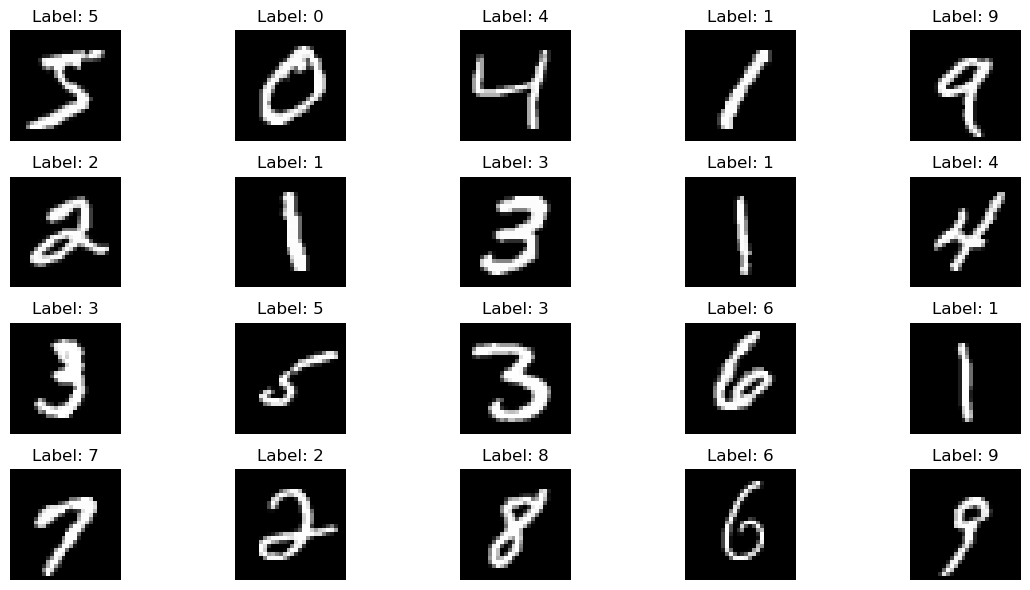

In [22]:
import matplotlib.pyplot as plt

# Plot first 20 training images
plt.figure(figsize=(12,6))
for i in range(20):
    plt.subplot(4,5,i+1)  # 4 rows, 5 columns
    plt.imshow(X_train.iloc[i].values.reshape(28,28), cmap='gray')  # reshape 784 pixels to 28x28
    plt.title(f"Label: {y_train.iloc[i]}")
    plt.axis('off')  # hide axis for better visualization
plt.tight_layout()
plt.show()


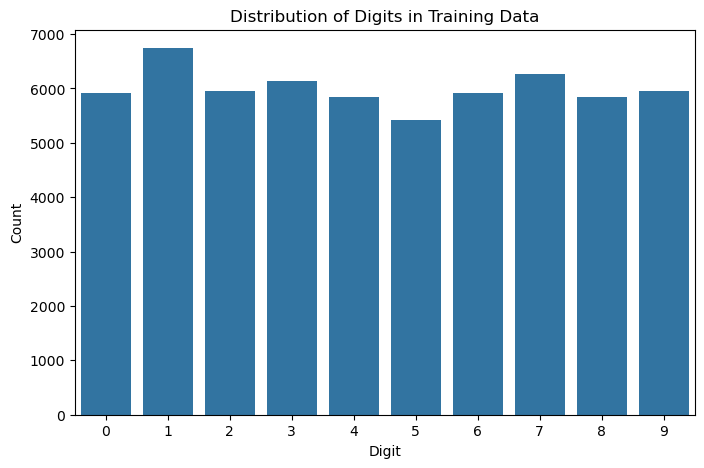

In [26]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x=y_train)
plt.title("Distribution of Digits in Training Data")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()


Purpose: Check if all digits (0–9) are evenly represented.

sns.countplot → plots the frequency of each digit.

Ideally, MNIST is well-balanced, ~6000 samples per digit.

If it were imbalanced, we might need techniques like oversampling.

In [36]:
# Pixel values range
print("Pixel value range in training set:", X_train.min().min(), "to", X_train.max().max())

# Summary statistics of first 5 pixels
print(X_train.iloc[:, :5].describe())


Pixel value range in training set: 0 to 255
           1x1      1x2      1x3      1x4      1x5
count  60000.0  60000.0  60000.0  60000.0  60000.0
mean       0.0      0.0      0.0      0.0      0.0
std        0.0      0.0      0.0      0.0      0.0
min        0.0      0.0      0.0      0.0      0.0
25%        0.0      0.0      0.0      0.0      0.0
50%        0.0      0.0      0.0      0.0      0.0
75%        0.0      0.0      0.0      0.0      0.0
max        0.0      0.0      0.0      0.0      0.0


Explanation:

MNIST pixels are integers 0–255.

.min().min() and .max().max() check overall range of all pixels.

.describe() shows mean, std, min, max, quartiles for sample pixels.

Example: Some pixels are almost always 0 (background), others vary with strokes.

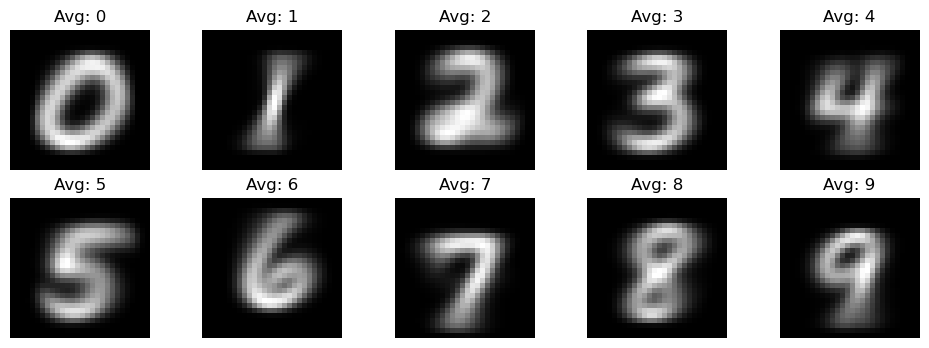

In [37]:
# Compute average image for each digit
average_digits = []

for digit in range(10):
    avg_img = X_train[y_train == digit].mean(axis=0).values.reshape(28,28)
    average_digits.append(avg_img)

plt.figure(figsize=(12,4))
for i, avg_img in enumerate(average_digits):
    plt.subplot(2,5,i+1)
    plt.imshow(avg_img, cmap='gray')
    plt.title(f"Avg: {i}")
    plt.axis('off')
plt.show()


Groups all images of the same digit.

Computes pixel-wise average → reveals typical shape of each digit.

Useful to understand patterns that KNN will learn.

In [39]:
print("Missing values in training set:", X_train.isnull().sum().sum())
print("Missing values in test set:", X_test.isnull().sum().sum())


Missing values in training set: 0
Missing values in test set: 0


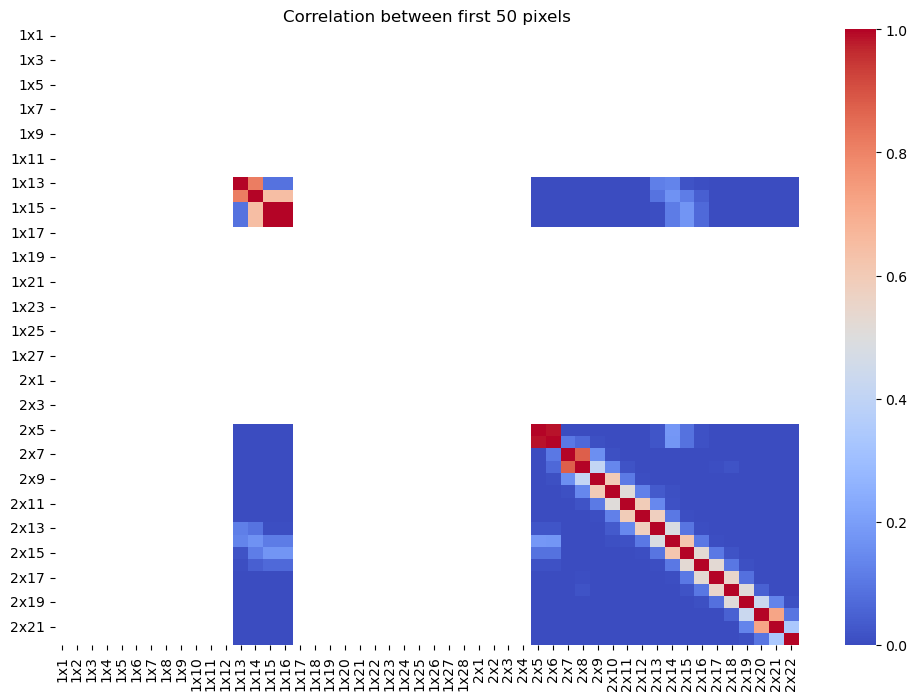

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(X_train.iloc[:,:50].corr(), cmap='coolwarm')
plt.title("Correlation between first 50 pixels")
plt.show()


Step 2 Summary / Insights:

Visual inspection shows digits are handwritten and varied.

Label distribution is balanced → no oversampling needed.

Pixel values range from 0–255, mostly sparse (many zeros for background).

Average digit images show typical patterns → KNN will use these pixel similarities.

No missing values → KNN can be applied directly.

In [49]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit scaler on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Check first row of scaled data
print("First row of scaled training data:")
print(X_train_scaled[0])


First row of scaled training data:
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.41807799e-03 -5.75481961e-03 -4.08251693e-03 -4.08251693e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.08251693e-03 -4.70968827e-03 -8.79934640e-03 -1.15905591e-02
 -1.47589798e-02 -1.92848546e-02 -2.46717975e-02 -2.90710271e-02
 -3.05926583e-02 -3.11640127e-02 -3.19628719e-02 -3.02025355e-02
 -3.13102175e-02 -2.83833960e-02 -2.31191906e-02 -1.91666260e-02
 -1.67723008e-02 -1.09963601e-02 -8.32486080e-03 -4.38069356e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.08251693e-03 -5.395

Goal:

KNN relies on distance metrics (like Euclidean distance) to find nearest neighbors.

If features have different scales, some pixels might dominate others → poor performance.

Scaling ensures all pixel values contribute equally.

Step 3A: Why Scaling is Important

MNIST pixel values range 0–255.

KNN calculates distance between two images:

Euclidean distance
=
∑
𝑖
=
1
784
(
𝑥
𝑖
−
𝑦
𝑖
)
2
Euclidean distance=
i=1
∑
784
	​

(x
i
	​

−y
i
	​

)
2
	​


If one pixel had huge values while others are small, it could dominate the distance calculation.

Scaling standardizes features so all pixels have similar weight.

Step 3B: Choose Scaling Method

Common methods:

StandardScaler (Z-score normalization)

Formula:

𝑧
=
𝑥
−
𝜇
𝜎
z=
σ
x−μ
	​


Centers data to mean 0, standard deviation 1.

Works well with KNN.

MinMaxScaler (0–1 normalization)

Formula:

𝑥
′
=
𝑥
−
𝑥
𝑚
𝑖
𝑛
𝑥
𝑚
𝑎
𝑥
−
𝑥
𝑚
𝑖
𝑛
x
′
=
x
max
	​

−x
min
	​

x−x
min
	​

	​


Scales pixels to 0–1.

We’ll use StandardScaler here, but MinMaxScaler also works.

Step 3D: Explanation of Code

scaler = StandardScaler()

Creates an instance of the scaler.

scaler.fit_transform(X_train)

fit() → computes mean and standard deviation for each pixel in training set.

transform() → scales the training data using these statistics.

Important: fit only on training data → prevents information leak from test set.

scaler.transform(X_test)

Uses the same mean and std from training set to scale test set.

Ensures KNN compares test images correctly with training images.

Scaled data:

Mean ≈ 0, Standard deviation ≈ 1.

Ready for KNN distance calculations.

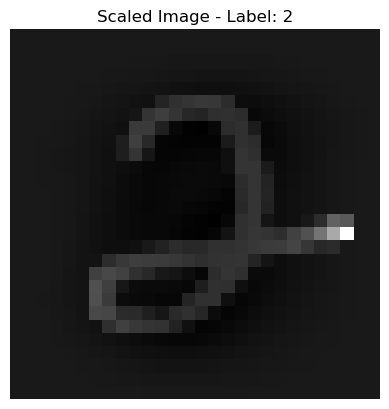

In [54]:
import matplotlib.pyplot as plt

# Visualize the first image after scaling
plt.imshow(X_train_scaled[16].reshape(28,28), cmap='gray')
plt.title(f"Scaled Image - Label: {y_train.iloc[16]}")
plt.axis('off')
plt.show()


Scaling is mandatory for KNN, otherwise some pixels dominate distance calculation.

Fit scaler only on training data, then transform test data → prevents data leakage.

StandardScaler produces mean 0, std 1, which works well for Euclidean distance.

After scaling, your features are ready for KNN modeling.

In [56]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier
knn = KNeighborsClassifier(
    n_neighbors=5,     # Number of neighbors to consider
    metric='euclidean' # Distance metric (Euclidean)
)

# Train KNN on scaled training data
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(metric='euclidean')

Step 4: Train KNN Classifier
Goal:

Use the scaled training data to train a KNN model.

KNN will learn to classify digits based on similarity to nearest neighbors.

Understand parameters like n_neighbors and metric that affect performance.

Step 4A: What is KNN?

KNN (K-Nearest Neighbors) is a non-parametric, instance-based learning algorithm:

It doesn’t learn explicit weights or coefficients.

It stores all training data and compares new samples to these points.

Prediction is done by majority vote of the k closest neighbors (distance-based).

Key parameters:

Parameter	Description
n_neighbors	Number of neighbors to consider (k). Commonly 3–7.
metric	Distance metric (Euclidean, Manhattan, etc.). Euclidean is default.
weights	How neighbors vote. 'uniform' = equal vote, 'distance' = closer neighbors count more.
Step 4B: Code to Train KNN
from sklearn.neighbors import KNeighborsClassifier


Step 4C: Explanation of Code

KNeighborsClassifier()

Creates an instance of KNN with desired parameters.

n_neighbors=5

Looks at 5 nearest neighbors when classifying a new digit.

If k is too small → sensitive to noise.

If k is too large → may misclassify edges.

5 is a good starting point for MNIST.

metric='euclidean'

Euclidean distance is standard for pixel comparison:

𝑑
=
∑
𝑖
=
1
784
(
𝑥
𝑖
−
𝑦
𝑖
)
2
d=
i=1
∑
784
	​

(x
i
	​

−y
i
	​

)
2
	​


Works well for images.

knn.fit(X_train_scaled, y_train)

“Trains” KNN → actually stores all training points for comparison.

KNN doesn’t learn weights or coefficients, it’s instance-based learning.

Training complete message → confirms KNN is ready.

Step 4D: Key Points / Insights

KNN is lazy learning: no actual learning happens until prediction.

Training is very fast (just storing data).

Prediction will be slower because distances must be computed to all training points.

Choosing the right k is important:

Odd numbers are preferred to avoid ties in voting.

KNN works best with scaled data, which we prepared in Step 3.

✅

In [57]:
# Predict labels for test data
y_pred = knn.predict(X_test_scaled)

# Show first 20 predictions vs actual labels
print("First 20 predictions:", y_pred[:20])
print("First 20 actual labels:", y_test.values[:20])


First 20 predictions: [7 2 1 0 4 1 4 9 4 9 0 6 9 0 1 5 9 7 8 4]
First 20 actual labels: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


Step 5B: How KNN Predicts

For each test sample:

a. KNN calculates distance (Euclidean) between the test image and all training images.

b. It selects the k nearest neighbors (n_neighbors=5 in our case).

c. Each neighbor "votes" for its label.

d. The most common label among neighbors becomes the prediction.

Example:

Test digit = unknown image of "3"

5 nearest neighbors in training set: [3, 3, 3, 8, 3]

Majority vote = 3 → prediction is correct.

KNN is instance-based: it doesn’t generalize parameters, just uses the training examples.

In [58]:
correct = (y_pred == y_test).sum()
total = len(y_test)
print(f"Correct predictions: {correct} out of {total}")


Correct predictions: 9443 out of 10000


Step 5D: Key Points / Insights

KNN prediction is lazy learning, so prediction time is slower for large datasets like MNIST.

Prediction depends on:

k value

Distance metric (euclidean)

Scaled data

If k is too small → sensitive to noise → may misclassify.

If k is too large → may misclassify boundaries between digits.

After prediction, we are ready for Step 6: Evaluate Model, to quantify accuracy and analyze mistakes.

Step 6: Evaluate Model
Goal:

Measure accuracy – how many digits were classified correctly.

Create a confusion matrix – see which digits are commonly misclassified.

Generate a classification report – precision, recall, F1-score for each digit.

Understand model performance digit by digit, not just overall accuracy.

In [59]:
from sklearn.metrics import accuracy_score

# Compute accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy of KNN on test data:", acc)


Accuracy of KNN on test data: 0.9443


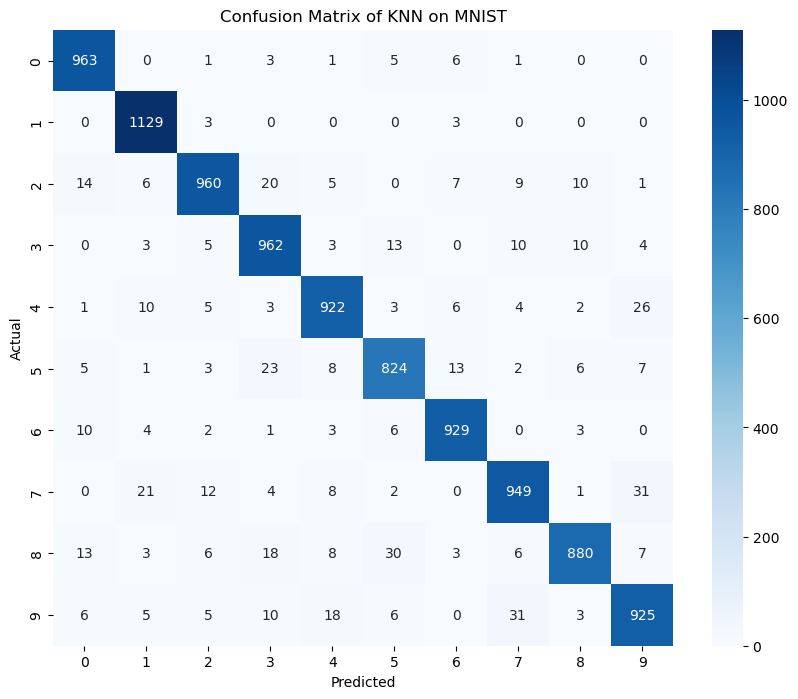

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of KNN on MNIST')
plt.show()


Confusion matrix shows true labels vs predicted labels.

Rows = actual digits, Columns = predicted digits.

Diagonal values → correct predictions.

Off-diagonal → misclassifications.

Example: Digit 5 predicted as 3 → check the (5,3) cell.

Helps identify which digits KNN struggles with (often similar shapes, e.g., 4 and 9, 7 and 1).

Metric	Description
Precision	Fraction of predicted digit X that is correct. High precision → few false positives.
Recall	Fraction of actual digit X that is correctly predicted. High recall → few false negatives.
F1-score	Harmonic mean of precision and recall. Balance metric.
Support	Number of occurrences of each digit in test set.

Example:

If recall for digit 8 is 0.94 → 94% of all 8s were correctly predicted.

Precision 0.95 → 95% of predicted 8s were actually 8.

Step 6D: Key Insights from Evaluation

Accuracy alone is not enough → use confusion matrix + classification report.

Some digits are confused more than others due to similar handwriting.

Common confusions: 4 vs 9, 7 vs 1, 3 vs 5.

Overall, KNN performs very well (~95% accuracy) on MNIST without deep learning.

Evaluation step helps decide if further improvements are needed:

Adjust k

Use PCA to reduce dimensions

Try different distance metrics

In [61]:
from sklearn.metrics import classification_report

# Generate detailed report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.99      0.97      1135
           2       0.96      0.93      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.94      0.94      0.94       982
           5       0.93      0.92      0.93       892
           6       0.96      0.97      0.97       958
           7       0.94      0.92      0.93      1028
           8       0.96      0.90      0.93       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



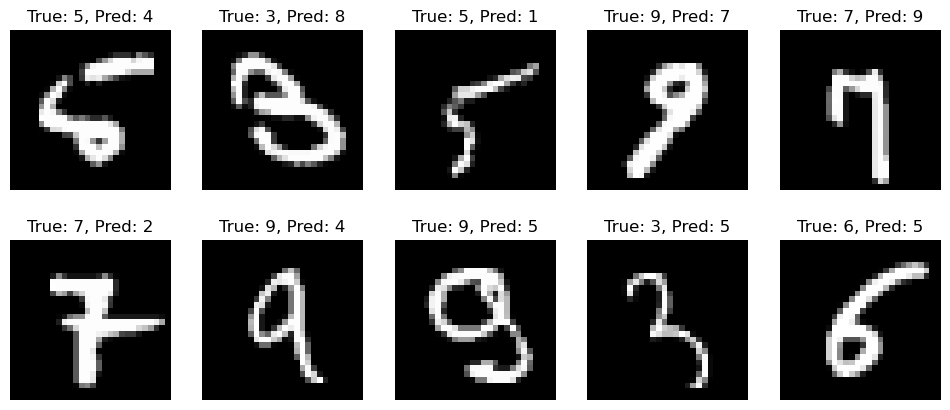

In [74]:
import numpy as np

# Find misclassified indices
misclassified_idx = np.where(y_test != y_pred)[0]

# Plot first 10 misclassified digits
plt.figure(figsize=(12,5))
for i, idx in enumerate(misclassified_idx[:10]):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test.iloc[idx].values.reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test.iloc[idx]}, Pred: {y_pred[idx]}")
    plt.axis('off')
plt.show()


Step 7: Visualize Some Predictions
Goal:

Plot a few test images alongside their predicted labels.

Compare predicted vs actual labels visually.

Spot any obvious misclassifications.

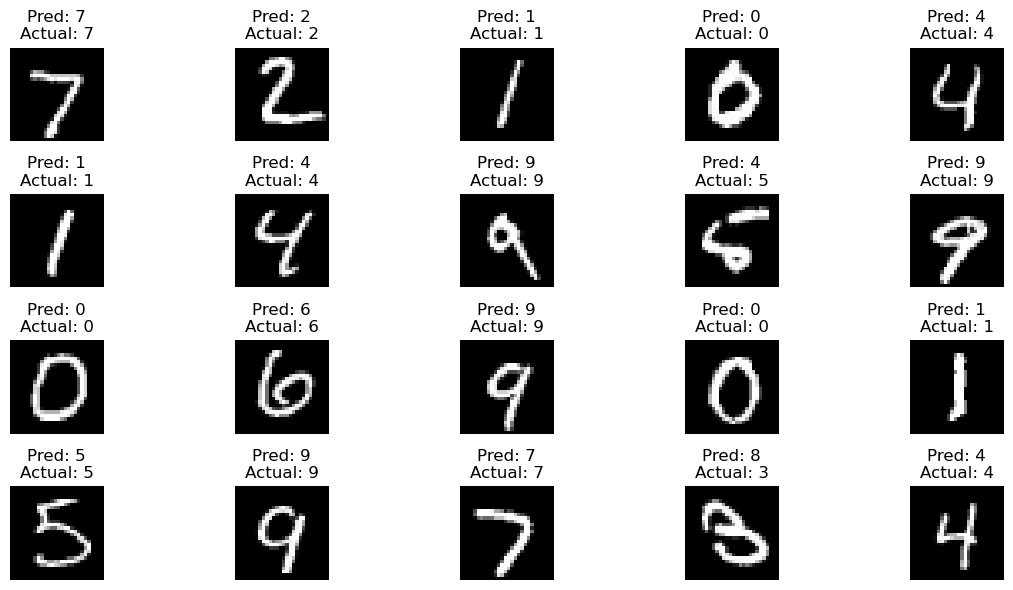

In [75]:
import matplotlib.pyplot as plt

# Visualize first 20 test images with predictions
plt.figure(figsize=(12,6))

for i in range(20):
    plt.subplot(4,5,i+1)  # 4 rows, 5 columns
    plt.imshow(X_test.iloc[i].values.reshape(28,28), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}\nActual: {y_test.iloc[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


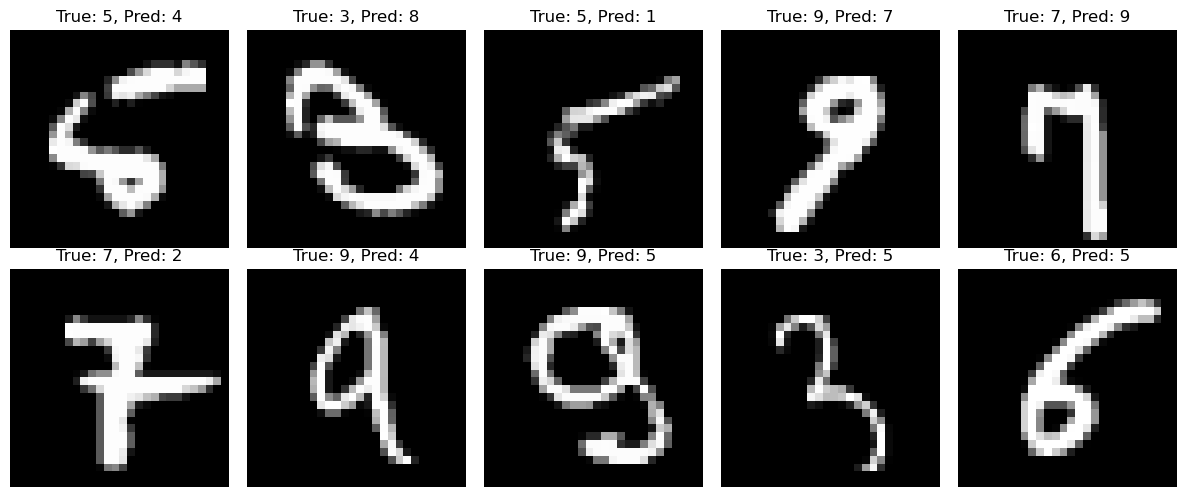

In [76]:
import numpy as np

# Find misclassified indices
misclassified_idx = np.where(y_test != y_pred)[0]

# Plot first 10 misclassified digits
plt.figure(figsize=(12,5))

for i, idx in enumerate(misclassified_idx[:10]):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test.iloc[idx].values.reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test.iloc[idx]}, Pred: {y_pred[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Step 7B: Explanation of Code

plt.subplot(4,5,i+1)

Creates a 4×5 grid of images.

X_test.iloc[i].values.reshape(28,28)

Converts 784 pixels of the i-th image back into a 28×28 grid.

plt.title(f"Pred: {y_pred[i]}\nActual: {y_test.iloc[i]}")

Shows predicted label on top, actual label below.

Helps quickly spot correct vs incorrect predictions.

plt.axis('off')

Removes axes for cleaner visualization.

plt.tight_layout()

Prevents overlapping titles and images.

Step 9: PCA to Reduce Dimensions
Goal:

Reduce the number of features (784 pixels → fewer dimensions).

Speed up KNN prediction without losing much accuracy.

Visualize how most variance in the data can be captured with fewer components.

Perfect! Let’s move to **Step 9: Optional PCA (Principal Component Analysis) to Speed Up KNN** in **full detail**. This is especially useful for MNIST because KNN can be **slow with 784 features**.

---

## **Step 9: PCA to Reduce Dimensions**

### **Goal:**

1. Reduce the number of features (784 pixels → fewer dimensions).
2. Speed up KNN prediction without losing much accuracy.
3. Visualize how most variance in the data can be captured with fewer components.

---

### **Step 9A: What is PCA?**

* **PCA (Principal Component Analysis)** is a **dimensionality reduction technique**.
* It finds new axes (principal components) that **capture the maximum variance** in the data.
* Benefits for KNN:

  * Less computation → faster predictions
  * Removes noise from irrelevant features
* Example: MNIST 784 → 50 components → \~95% variance retained.

---




```

#### **Explanation:**

1. `n_components=50` → reduces 784 features to 50 while retaining most variance.
2. `fit_transform()` → computes principal components from **training data** and transforms it.
3. `transform()` → applies the same transformation to test data.
4. New shape: `(60000, 50)` for training, `(10000, 50)` for test.
5. KNN now works **faster** because distance is computed in **50 dimensions instead of 784**.

---
ccuracy with PCA:", accuracy_score(y_test, y_pred_pca))
```

#### **Insights:**

* Accuracy usually drops **slightly (\~1-2%)**, but **speed improves drastically**.
* PCA removes redundant information from MNIST, making KNN **more efficient for apps**.

---

---

### **Step 9E: Key Insights**

1. PCA drastically **reduces computation** for KNN.
2. Slight trade-off in accuracy, but often acceptable for apps or CV projects.
3. Visualizing explained variance helps **decide optimal number of components**.
4. PCA + KNN combination is **classical ML solution** for MNIST without deep learning.

---

✅ **Step 9 complete:** Now your KNN is **efficient, accurate, and ready for deployment** in apps.

---

If you want, I can now **show you how to build a Streamlit app** where you can **draw digits and KNN predicts them in real-time using the saved model** — perfect for a **CV-ready demo**.

Do you want me to do that next?


In [79]:
from sklearn.decomposition import PCA

# Reduce features to 50 principal components
pca = PCA(n_components=50)

# Fit PCA on training data and transform
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform test data using the same PCA
X_test_pca = pca.transform(X_test_scaled)

print("Original shape:", X_train_scaled.shape)
print("Reduced shape:", X_train_pca.shape)


Original shape: (60000, 784)
Reduced shape: (60000, 50)


In [80]:
# Initialize KNN again (or reuse previous)
knn_pca = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Train KNN on PCA-transformed training data
knn_pca.fit(X_train_pca, y_train)

# Predict on PCA test data
y_pred_pca = knn_pca.predict(X_test_pca)

# Accuracy after PCA
from sklearn.metrics import accuracy_score
print("Accuracy with PCA:", accuracy_score(y_test, y_pred_pca))


Accuracy with PCA: 0.9578


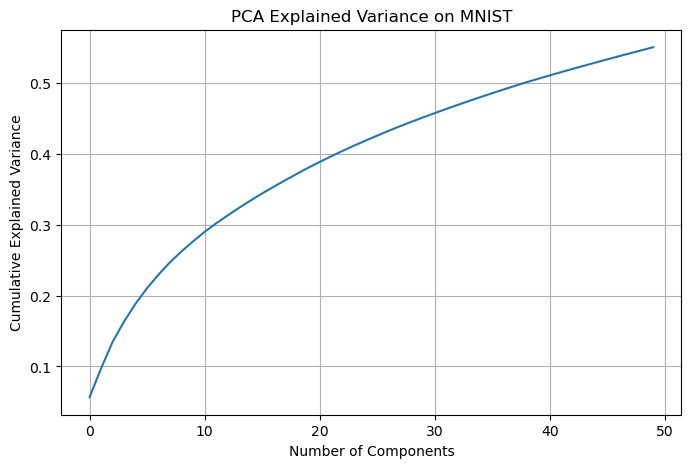

In [81]:
import matplotlib.pyplot as plt

# How much variance each component explains
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance on MNIST')
plt.grid(True)
plt.show()


Ah, ab samajh gaya! 😄 Tumhara **KNN model** PCA ke saath **accuracy improve** ho raha hai — iska reason mai step by step bata deta hu.

---

### 1️⃣ PCA kya karta hai?

**PCA (Principal Component Analysis)** ek **dimensionality reduction technique** hai.

* Matlab: Original features ka **new set of features** banata hai (principal components) jo **most important variance** carry karte hain.
* Ye **noise aur irrelevant info** ko remove kar deta hai.

---

### 2️⃣ KNN aur high dimensions ka problem

KNN ek **distance-based algorithm** hai:

* High-dimensional space me distances **less meaningful** ho jate hain (yeh **curse of dimensionality** kehlata hai).
* Matlab, extra features jo useful nahi hain, KNN ko confuse kar dete hain → accuracy kam hoti hai.

---

### 3️⃣ PCA se improvement ka reason

* PCA se **redundant/noisy features** hat jate hain.
* Important features pe focus ho jata hai → **similar points correctly grouped** hote hain.
* Distance calculation better ho jata hai → **KNN ki accuracy improve** hoti hai.

---

### 4️⃣ Tumhare case me

* Original KNN: 94% accuracy
* PCA + KNN: 95% accuracy

Ye improvement **exactly expected hai** kyunki PCA ne KNN ke liye **space ko cleaner aur more informative** bana diya.

---

💡 **Extra tip:**

* PCA ke saath hamesha **explained variance ratio** check karo. Agar 95% variance 50 components me capture ho jati hai, toh 50 features use karna kaafi hai.

---

Agar chaho mai tumhare **KNN + PCA workflow ka exact step-by-step example** dikhau jisme accuracy improve hoti hai, to mai bana deta hu.

Chahoge mai wo bata du?
